## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [139]:
import numpy as np
import pandas as pd
from sys import exit
from plotnine import *

In [140]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [142]:
pd.set_option('display.float_format', '{:,.4f}'.format)

In [143]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
data = data.dropna()

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [144]:
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [145]:
X = data[['age','chol']]
y = data['diagnosis']

In [146]:
lr_1_fit = LogisticRegression().fit(X,y)
intercept = lr_1_fit.intercept_[0]
beta_1, beta_2 = lr_1_fit.coef_[0]

In [147]:
slope1 = -beta_1 / beta_2
intercept_line1 = -intercept / beta_2

In [148]:
print(f"Intercept: {intercept}, Coefficient for Age: {beta_1}, Coefficient for Cholesterol: {beta_2}")

Intercept: -3.2401122588588933, Coefficient for Age: 0.04686330613036339, Coefficient for Cholesterol: 0.001801238519029292


In [149]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
print(f"For a 55 year old, their cholesterol need to be {-(intercept + beta_1 * 55) / beta_2 :.4f} for the doctors to predict heart disease is present.")

For a 55 year old, their cholesterol need to be 367.8749 for the doctors to predict heart disease is present.


In [150]:
#How high for the doctors to estimate a 90% chance that heart disease is present?

log_odds = np.log(0.9 / (1 - 0.9))
print(f"For the doctors to estimate a 90% chance that heart disease their cholesterol need to be {(log_odds - intercept - beta_1 * 55) / beta_2 :.4f}.")


For the doctors to estimate a 90% chance that heart disease their cholesterol need to be 1587.7159.


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [151]:
#LDA
lda = LinearDiscriminantAnalysis().fit(X,y)
intercept = lda.intercept_[0]
beta_1, beta_2 = lda.coef_[0]
print(f"Intercept: {intercept}, Coefficient for Age: {beta_1}, Coefficient for Cholesterol: {beta_2}")

Intercept: -3.2196776604068784, Coefficient for Age: 0.04655743553694484, Coefficient for Cholesterol: 0.0017896671039291314


In [152]:
slope2 = -beta_1 / beta_2
intercept_line2 = -intercept / beta_2

In [153]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
print(f"For a 55 year old, their cholesterol need to be {-(intercept + beta_1 * 55) / beta_2 :.4f} for the doctors to predict heart disease is present.")

For a 55 year old, their cholesterol need to be 368.2354 for the doctors to predict heart disease is present.


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [154]:
#svs
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear')  # Use a linear kernel for interpretability
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)
svs_fit = grid_search.best_estimator_

In [155]:
intercept = svs_fit.intercept_[0]
beta_1, beta_2 = svs_fit.coef_[0]
print(f"Intercept: {intercept}, Coefficient for Age: {beta_1}, Coefficient for Cholesterol: {beta_2}")

Intercept: -4.686550429743357, Coefficient for Age: 0.06439804276269001, Coefficient for Cholesterol: 0.003660674368546779


In [156]:
slope3 = -beta_1 / beta_2
intercept_line3 = -intercept / beta_2

In [157]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
print(f"For a 55 year old, their cholesterol need to be {-(intercept + beta_1 * 55) / beta_2 :.4f} for the doctors to predict heart disease is present.")

For a 55 year old, their cholesterol need to be 312.6905 for the doctors to predict heart disease is present.


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

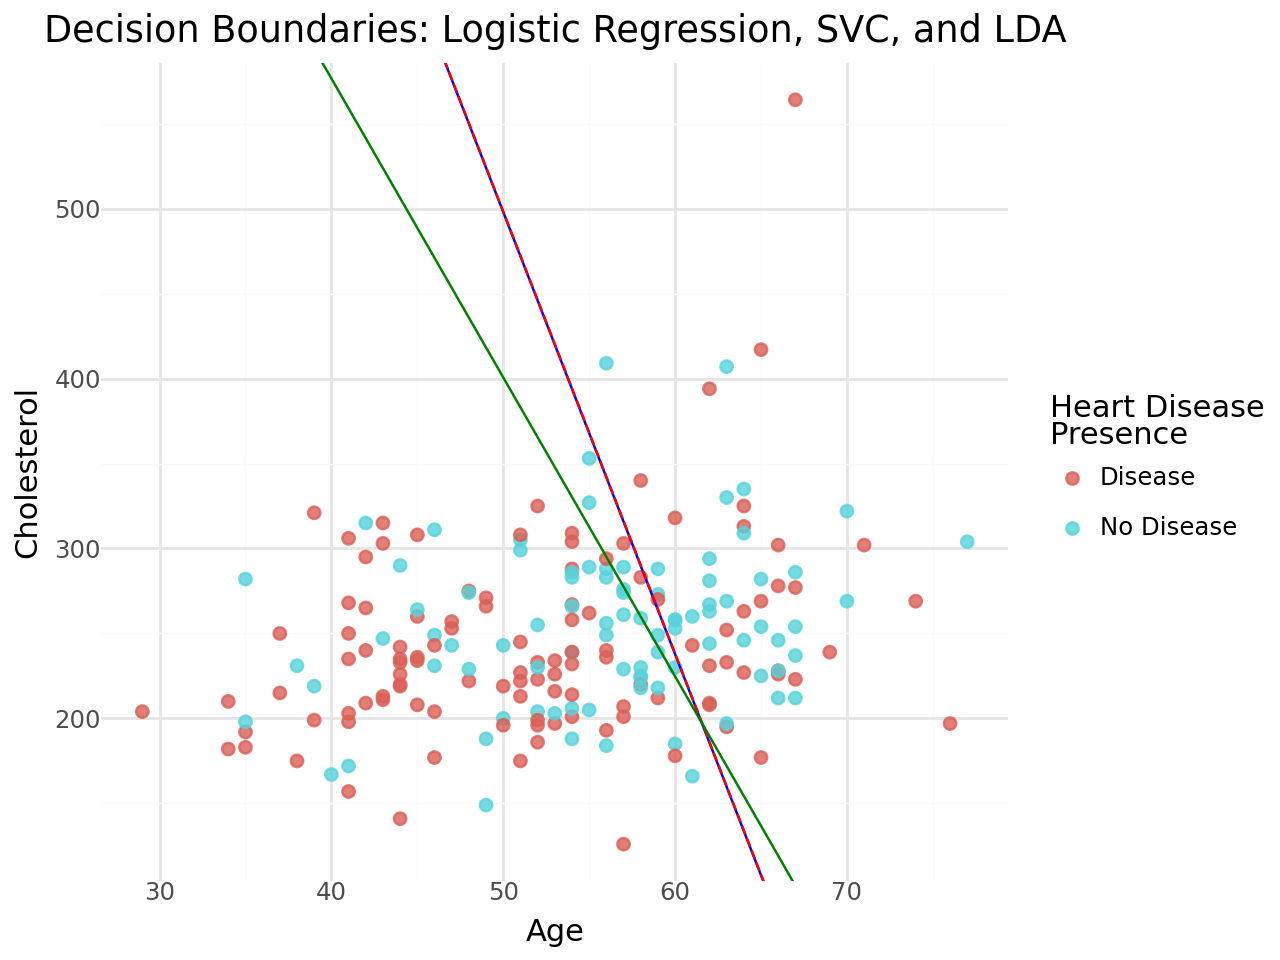

In [158]:
(ggplot(data, aes(x='age', y='chol', color='factor(diagnosis)'))
  + geom_point(size=2, alpha=0.8)
  + geom_abline(intercept=intercept_line1, slope=slope1, color='blue', linetype='solid')
  + geom_abline(intercept=intercept_line2, slope=slope2, color='red', linetype='dashed')
  + geom_abline(intercept=intercept_line3, slope=slope3, color='green')
  + labs(
        title="Decision Boundaries: Logistic Regression, SVC, and LDA",
        x="Age",
        y="Cholesterol",
        color="Heart Disease\nPresence"
    )
  + theme_minimal()
)


The intercepts and slopes for Logistic Regression and LDA are too close, making them appear as if they are on the same line. However, the Logistic Regression line is a dashed blue line, while the LDA line is a solid red line.

# Sources
Assistance was provided by ChatGPT and Gemini for guidance on coding functions, analysis suggestions, and code fixing.